# <span style="color: #2E86C1;">Project Overview: 2.5.7. Fake News Detection - Starter Kit</span>

## <span style="color: #28B463;">Objective</span>
The primary goal of this project is to build a predictive model that can accurately identify fake news articles. By leveraging machine learning techniques, the model aims to enhance information integrity and combat misinformation in the digital age.

## <span style="color: #28B463;">Dataset</span>
The dataset used in this project consists of news articles labeled as real or fake. It includes various features such as article content, publication date, and additional metadata to help distinguish between genuine and misleading news.

## <span style="color: #2E86C1;">Key Steps in the Project</span>

### <span style="color: #A569BD;">1. Data Collection</span>
- Load the dataset into a pandas DataFrame for further analysis.

### <span style="color: #A569BD;">2. Exploratory Data Analysis (EDA)</span>
- Perform an initial investigation of the dataset to understand its structure and identify any missing values or anomalies.
- Visualize distributions and relationships among features to gain insights into data characteristics.

### <span style="color: #A569BD;">3. Data Preprocessing</span>
- Clean the data by addressing missing values, outliers, and ensuring consistency in feature formats.
- Normalize textual data using techniques like tokenization and stemming to enhance model performance.

### <span style="color: #A569BD;">4. Feature Engineering</span>
- Create new features based on existing ones, such as word counts or sentiment scores, to improve the model's predictive capability.
- Convert categorical variables into numerical formats using techniques like one-hot encoding.

### <span style="color: #A569BD;">5. Handling Class Imbalance</span>
- Utilize techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset and mitigate the impact of class imbalance on model performance.

### <span style="color: #A569BD;">6. Model Selection and Training</span>
- Choose an appropriate machine learning model (e.g., Random Forest Classifier, Logistic Regression) based on the characteristics of the dataset.
- Split the data into training and testing sets to evaluate model performance effectively.

### <span style="color: #A569BD;">7. Model Evaluation</span>
- Assess model performance using metrics such as accuracy, precision, recall, and F1-score.
- Generate a confusion matrix to visualize true positives, false positives, true negatives, and false negatives.

### <span style="color: #A569BD;">8. Conclusion</span>
- Summarize findings and discuss the implications of the model's performance.
- Suggest potential improvements for future work, including hyperparameter tuning and exploration of additional algorithms.

## <span style="color: #E74C3C;">Future Enhancements</span>
- Explore advanced techniques such as ensemble learning and deep learning models for potentially improved performance.
- Incorporate additional datasets or features that could contribute to better fake news detection.

# <span style="color: #2E86C1;">Importing Libraries</span>

## <span style="color: #28B463;">Overview</span>
In this step, we import the essential libraries required for data manipulation, analysis, and machine learning modeling. These libraries provide the foundational tools necessary for processing and analyzing our dataset effectively.

## <span style="color: #A569BD;">Key Libraries</span>

- **zipfile**:
  - Used for extracting zip files, allowing us to access datasets packaged in zip format easily.

- **os**:
  - A library for interacting with the operating system. It provides functions to navigate the file system and manage file paths.

- **pandas**:
  - A powerful data manipulation and analysis library. It allows us to create and manage DataFrames, making it easier to clean, transform, and analyze structured data.

- **matplotlib.pyplot**:
  - A plotting library for creating static, animated, and interactive visualizations in Python. It is widely used for visualizing data in various formats.

- **seaborn**:
  - Built on Matplotlib, Seaborn provides a high-level interface for drawing attractive statistical graphics. It simplifies complex visualizations and enhances the aesthetics of plots.

- **sklearn.model_selection.train_test_split**:
  - A utility function for splitting a dataset into training and testing sets. It is essential for evaluating model performance effectively.

- **sklearn.ensemble.RandomForestClassifier**:
  - Implements the Random Forest algorithm for classification tasks. This ensemble method is robust and helps improve prediction accuracy by combining multiple decision trees.

- **sklearn.metrics.classification_report, confusion_matrix**:
  - Tools for evaluating the performance of classification models. The classification report provides metrics such as precision, recall, and F1-score, while the confusion matrix visualizes the model's performance in a tabular format.

- **sklearn.preprocessing.StandardScaler**:
  - Used for feature scaling, this tool standardizes features by removing the mean and scaling to unit variance. It helps improve the performance of many machine learning algorithms.

- **sklearn.impute.SimpleImputer**:
  - A class for handling missing data. It allows us to fill missing values using various strategies, such as mean, median, or most frequent.

- **sklearn.utils.class_weight.compute_class_weight**:
  - Computes the class weights based on the distribution of classes in the dataset. This is helpful in addressing class imbalance issues during model training.

- **imblearn.over_sampling.SMOTE**:
  - The Synthetic Minority Over-sampling Technique (SMOTE) generates synthetic samples for the minority class in an imbalanced dataset, helping to balance the classes and improve model performance.

- **numpy**:
  - A fundamental package for numerical operations in Python. It provides support for arrays, matrices, and a large library of mathematical functions.

- **wordcloud.WordCloud**:
  - Imports the WordCloud class for generating word clouds, which visually represent the frequency of words in a text corpus. This can be useful for text analysis and visualization.

In [23]:
# --- Imports ---

In [24]:
import zipfile  # For extracting zip files

In [25]:
import os  # For interacting with the operating system

In [26]:
import pandas as pd  # For data manipulation and analysis

In [27]:
import matplotlib.pyplot as plt  # For data visualization

In [28]:
import seaborn as sns  # For statistical data visualization

In [29]:
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

In [30]:
from sklearn.ensemble import RandomForestClassifier  # For the Random Forest classification algorithm

In [31]:
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation metrics

In [32]:
from sklearn.preprocessing import StandardScaler  # For feature scaling

In [33]:
from sklearn.impute import SimpleImputer  # For handling missing data

In [34]:
from sklearn.utils.class_weight import compute_class_weight  # For computing class weights

In [35]:
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets

In [36]:
import numpy as np  # For numerical operations

In [37]:
from wordcloud import WordCloud  # Imports WordCloud for generating word clouds

In [179]:
import warnings  # For managing warnings in the output

In [180]:
warnings.filterwarnings('ignore')  # Ignore all warnings to keep the output clean

In [38]:
# --- Unzipping the Dataset ---

In [39]:
# Path to the zip file

In [40]:
zip_file_path = '/content/drive-download-20230309T000900Z-001.zip'  # Specifies the location of the zip file

In [41]:
# Directory where the zip will be extracted

In [42]:
extraction_path = '/content/fake_news_dataset'  # Specifies the extraction directory

In [43]:
# Unzipping the dataset

In [44]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:  # Opens the zip file
    zip_ref.extractall(extraction_path)  # Extracts all contents to the specified directory

In [45]:
# Listing all files in the unzipped folder

In [46]:
all_files = []  # Initializes an empty list to store file paths

In [47]:
for root, dirs, files in os.walk(extraction_path):  # Walks through the extraction directory
    for file in files:  # Iterates through each file
        all_files.append(os.path.join(root, file))  # Appends the full path of each file to the list

In [48]:
# Printing all files

In [49]:
for file in all_files:  # Iterates through the list of files
    print(file)  # Prints the file path

/content/fake_news_dataset/Attack 4(Noisy Injection)/1553_noisy injection_attack4.csv
/content/fake_news_dataset/Attack 4(Noisy Injection)/1553_noisy injection_attack4(dump).txt
/content/fake_news_dataset/Attack 2 (Broadcast DOS)/1553_dos_attack2_(broadcast)(dump).txt
/content/fake_news_dataset/Attack 2 (Broadcast DOS)/1553_dos_attack2(broadcast).csv
/content/fake_news_dataset/Attack 1 (Basic DOS)/1553_dos_attack1.csv
/content/fake_news_dataset/Attack 1 (Basic DOS)/1553_dos_attack1(dump).txt
/content/fake_news_dataset/Attack 5(Logic )/1553_logic_attack5-1.csv
/content/fake_news_dataset/Attack 5(Logic )/1553_logic-attack5(dump).txt
/content/fake_news_dataset/Normal (Benign) Data/1553_Benign.csv
/content/fake_news_dataset/Normal (Benign) Data/1553_Benign(dump).txt
/content/fake_news_dataset/Attack 3(Subtle Injection)/1553_subtle injection_attack3.csv
/content/fake_news_dataset/Attack 3(Subtle Injection)/1553_subtle injection_attack3(dump).txt
/content/fake_news_dataset/Attack6(Logic_Inje

# <span style="color: #2E86C1;">Data Collection</span>

## <span style="color: #28B463;">Overview</span>
In this step, we will load the dataset into a pandas DataFrame for further analysis. This will allow us to examine the structure of the data and prepare it for exploratory data analysis (EDA).

## <span style="color: #A569BD;">Data Loading</span>
- Ensure the dataset file is accessible in your working directory.
- Use pandas to read the dataset into a DataFrame, facilitating easier manipulation and analysis.

In [50]:
# --- Loading Data ---

In [51]:
# List of CSV file paths

In [52]:
csv_file_paths = [
    '/content/fake_news_dataset/Attack 4(Noisy Injection)/1553_noisy injection_attack4.csv',  # Path to Attack 4 data
    '/content/fake_news_dataset/Attack 2 (Broadcast DOS)/1553_dos_attack2(broadcast).csv',  # Path to Attack 2 data
    '/content/fake_news_dataset/Attack 1 (Basic DOS)/1553_dos_attack1.csv',  # Path to Attack 1 data
    '/content/fake_news_dataset/Attack 5(Logic )/1553_logic_attack5-1.csv',  # Path to Attack 5 data
    '/content/fake_news_dataset/Normal (Benign) Data/1553_Benign.csv',  # Path to Normal data
    '/content/fake_news_dataset/Attack 3(Subtle Injection)/1553_subtle injection_attack3.csv',  # Path to Attack 3 data
    '/content/fake_news_dataset/Attack6(Logic_Injection)/1553_logic_injection_attack6.csv'  # Path to Attack 6 data
]

In [53]:
# Load and preview each CSV file

In [54]:
dataframes = []  # Initializes an empty list to store DataFrames

In [55]:
for file_path in csv_file_paths:  # Iterates through each file path
    df = pd.read_csv(file_path)  # Loads the CSV file into a DataFrame
    print(f"Preview of {file_path}:")  # Prints the current file path
    print(df.head(), end="\n\n")  # Prints the first 5 rows of the DataFrame
    dataframes.append(df)  # Appends the DataFrame to the list

Preview of /content/fake_news_dataset/Attack 4(Noisy Injection)/1553_noisy injection_attack4.csv:
   msgId    timestamp  error  modeCode channel connType  sa  ssa   da   dsa  \
0      1  3025.340230  False      True       A   BC->RT NaN  NaN  1.0   0.0   
1      2  3025.340309  False      True       A   BC->RT NaN  NaN  2.0   0.0   
2      3  3025.340388  False      True       A   BC->RT NaN  NaN  3.0   0.0   
3      4  3025.340467  False      True       A   BC->RT NaN  NaN  4.0   0.0   
4      5  3025.340631  False     False       A   BC->RT NaN  NaN  1.0  20.0   

   ...  dw26  dw27  dw28 dw29  dw30 dw31 malicious injected   gap msgTime  
0  ...   NaN   NaN   NaN  NaN   NaN  NaN     False    False   NaN    65.0  
1  ...   NaN   NaN   NaN  NaN   NaN  NaN     False    False  14.0    65.0  
2  ...   NaN   NaN   NaN  NaN   NaN  NaN     False    False  14.0    65.0  
3  ...   NaN   NaN   NaN  NaN   NaN  NaN     False    False  14.0    65.0  
4  ...   NaN   NaN   NaN  NaN   NaN  NaN     Fa

In [56]:
# Concatenate all DataFrames into a single DataFrame

In [57]:
combined_df = pd.concat(dataframes, ignore_index=True)  # Combines all DataFrames into one

In [58]:
# Display details of the combined DataFrame

In [59]:
print("Shape of the combined dataset:", combined_df.shape)  # Prints the shape of the combined DataFrame

Shape of the combined dataset: (27446, 52)


In [60]:
print("Column names:", combined_df.columns.tolist())  # Prints the column names of the DataFrame

Column names: ['msgId', 'timestamp', 'error', 'modeCode', 'channel', 'connType', 'sa', 'ssa', 'da', 'dsa', 'wc', 'modeCodeVal', 'txRsp', 'txSts', 'rxRsp', 'rxSts', 'dw0', 'dw1', 'dw2', 'dw3', 'dw4', 'dw5', 'dw6', 'dw7', 'dw8', 'dw9', 'dw10', 'dw11', 'dw12', 'dw13', 'dw14', 'dw15', 'dw16', 'dw17', 'dw18', 'dw19', 'dw20', 'dw21', 'dw22', 'dw23', 'dw24', 'dw25', 'dw26', 'dw27', 'dw28', 'dw29', 'dw30', 'dw31', 'malicious', 'injected', 'gap', 'msgTime']


In [61]:
print("Data types:\n", combined_df.dtypes)  # Prints the data types of each column

Data types:
 msgId            int64
timestamp      float64
error             bool
modeCode          bool
channel         object
connType        object
sa             float64
ssa            float64
da             float64
dsa            float64
wc             float64
modeCodeVal    float64
txRsp          float64
txSts           object
rxRsp          float64
rxSts           object
dw0             object
dw1             object
dw2             object
dw3             object
dw4             object
dw5             object
dw6             object
dw7             object
dw8             object
dw9             object
dw10            object
dw11            object
dw12            object
dw13            object
dw14            object
dw15            object
dw16            object
dw17            object
dw18            object
dw19            object
dw20            object
dw21            object
dw22            object
dw23            object
dw24            object
dw25            object
dw26            objec

In [63]:
print(combined_df.head())  # Prints the first 5 rows of the combined DataFrame

   msgId    timestamp  error  modeCode channel connType  sa  ssa   da   dsa  \
0      1  3025.340230  False      True       A   BC->RT NaN  NaN  1.0   0.0   
1      2  3025.340309  False      True       A   BC->RT NaN  NaN  2.0   0.0   
2      3  3025.340388  False      True       A   BC->RT NaN  NaN  3.0   0.0   
3      4  3025.340467  False      True       A   BC->RT NaN  NaN  4.0   0.0   
4      5  3025.340631  False     False       A   BC->RT NaN  NaN  1.0  20.0   

   ...  dw26  dw27  dw28 dw29  dw30 dw31 malicious injected   gap msgTime  
0  ...   NaN   NaN   NaN  NaN   NaN  NaN     False    False   NaN    65.0  
1  ...   NaN   NaN   NaN  NaN   NaN  NaN     False    False  14.0    65.0  
2  ...   NaN   NaN   NaN  NaN   NaN  NaN     False    False  14.0    65.0  
3  ...   NaN   NaN   NaN  NaN   NaN  NaN     False    False  14.0    65.0  
4  ...   NaN   NaN   NaN  NaN   NaN  NaN     False    False  99.0    65.0  

[5 rows x 52 columns]


In [64]:
# Optional: Save the combined dataset to a CSV file for future reference

In [65]:
combined_df.to_csv('/content/fake_news_combined_dataset.csv', index=False)  # Saves the combined DataFrame to a CSV file


# <span style="color: #2E86C1;">Exploratory Data Analysis (EDA)</span>

## <span style="color: #28B463;">Overview</span>
EDA is a critical step in understanding the data's structure and identifying patterns, trends, and anomalies. This step will help us gain insights into the dataset's characteristics and prepare it for modeling.

## <span style="color: #A569BD;">Key Activities</span>
- Check for missing values and duplicates in the dataset.
- Visualize the distribution of key features to understand their characteristics.
- Explore relationships between features to identify potential correlations.

# <span style="color: #2E86C1;">Data Preprocessing</span>

## <span style="color: #28B463;">Overview</span>
Data preprocessing is essential for cleaning and transforming the data into a suitable format for modeling. This step will address any inconsistencies, missing values, and prepare the features for machine learning algorithms.

## <span style="color: #A569BD;">Key Activities</span>
- Handle missing values through imputation or removal, as appropriate.
- Normalize or standardize numerical features to improve model performance.
- Ensure categorical variables are in a numerical format using techniques like one-hot encoding.

In [66]:
# --- Exploratory Data Analysis ---

In [67]:
# Load the dataset

In [68]:
combined_df = pd.read_csv('/content/fake_news_combined_dataset.csv')  # Loads the combined dataset from CSV

In [69]:
# Display basic information about the dataset

In [70]:
print("\nBasic information about the dataset:")  # Indicates the basic info section
print(combined_df.info())  # Prints a summary of the DataFrame


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27446 entries, 0 to 27445
Data columns (total 52 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   msgId        27446 non-null  int64  
 1   timestamp    27446 non-null  float64
 2   error        27446 non-null  bool   
 3   modeCode     27446 non-null  bool   
 4   channel      27446 non-null  object 
 5   connType     27446 non-null  object 
 6   sa           13888 non-null  float64
 7   ssa          13888 non-null  float64
 8   da           19228 non-null  float64
 9   dsa          19228 non-null  float64
 10  wc           17072 non-null  float64
 11  modeCodeVal  10374 non-null  float64
 12  txRsp        13842 non-null  float64
 13  txSts        13842 non-null  object 
 14  rxRsp        19039 non-null  float64
 15  rxSts        19039 non-null  object 
 16  dw0          27400 non-null  object 
 17  dw1          8887 non-null   object 
 18  dw2     

In [71]:
# Summary statistics of numerical features

In [72]:
print("\nSummary statistics of numerical features:")  # Indicates the summary statistics section
print(combined_df.describe())  # Prints summary statistics for numerical features


Summary statistics of numerical features:
              msgId     timestamp            sa           ssa            da  \
count  27446.000000  27446.000000  13888.000000  13888.000000  19228.000000   
mean    9710.716607    835.314020      2.270305     11.189156      2.802892   
std     7316.364664   1027.684502      2.157400     11.421650      2.968454   
min        1.000000     67.470672      0.000000      0.000000      1.000000   
25%     2416.250000    395.342937      1.000000      1.000000      2.000000   
50%     9277.500000    559.968520      1.000000      5.000000      3.000000   
75%    16138.750000    724.593277      4.000000     20.000000      3.000000   
max    23000.000000   5333.620878     31.000000     30.000000     31.000000   

                dsa            wc   modeCodeVal         txRsp    rxRsp  \
count  19228.000000  17072.000000  10374.000000  13842.000000  19039.0   
mean       3.456158      7.741858     16.942356      8.285688      8.5   
std        6.951002    

In [73]:
# Count of missing values in each column

In [74]:
print("\nCount of missing values in each column:")  # Indicates the missing values section
print(combined_df.isnull().sum())  # Prints the count of missing values for each column


Count of missing values in each column:
msgId              0
timestamp          0
error              0
modeCode           0
channel            0
connType           0
sa             13558
ssa            13558
da              8218
dsa             8218
wc             10374
modeCodeVal    17072
txRsp          13604
txSts          13604
rxRsp           8407
rxSts           8407
dw0               46
dw1            18559
dw2            19633
dw3            19633
dw4            19656
dw5            19656
dw6            19656
dw7            19656
dw8            19656
dw9            24864
dw10           24864
dw11           24864
dw12           24864
dw13           24864
dw14           24864
dw15           24864
dw16           24864
dw17           24864
dw18           24864
dw19           24864
dw20           25510
dw21           25510
dw22           25510
dw23           25510
dw24           25510
dw25           25510
dw26           25510
dw27           25510
dw28           25510
dw29          

In [75]:
# Data types of each column

In [76]:
print("\nData types of each column:")  # Indicates the data types section
print(combined_df.dtypes)  # Prints the data types for each column


Data types of each column:
msgId            int64
timestamp      float64
error             bool
modeCode          bool
channel         object
connType        object
sa             float64
ssa            float64
da             float64
dsa            float64
wc             float64
modeCodeVal    float64
txRsp          float64
txSts           object
rxRsp          float64
rxSts           object
dw0             object
dw1             object
dw2             object
dw3             object
dw4             object
dw5             object
dw6             object
dw7             object
dw8             object
dw9             object
dw10            object
dw11            object
dw12            object
dw13            object
dw14            object
dw15            object
dw16            object
dw17            object
dw18            object
dw19            object
dw20            object
dw21            object
dw22            object
dw23            object
dw24            object
dw25            object
dw26  

In [77]:
# Number of unique values in each column

In [78]:
print("\nNumber of unique values in each column:")  # Indicates the unique values section
print(combined_df.nunique())  # Prints the count of unique values for each column


Number of unique values in each column:
msgId          23000
timestamp      27446
error              2
modeCode           2
channel            2
connType           3
sa                 6
ssa                6
da                 5
dsa                4
wc                 6
modeCodeVal        2
txRsp              2
txSts              6
rxRsp              1
rxSts              5
dw0               47
dw1               11
dw2               19
dw3               26
dw4               20
dw5               12
dw6               20
dw7               13
dw8               11
dw9                1
dw10               1
dw11               1
dw12               1
dw13               1
dw14               1
dw15               1
dw16               1
dw17               1
dw18               1
dw19               1
dw20               1
dw21               1
dw22               1
dw23               1
dw24               1
dw25               1
dw26               1
dw27               1
dw28               1
dw29          

In [79]:
# --- Data Cleaning ---

In [80]:
# Identify numeric and categorical columns

In [81]:
numeric_cols = combined_df.select_dtypes(include=['number']).columns  # Selects numeric columns

In [82]:
categorical_cols = combined_df.select_dtypes(include=['object']).columns  # Selects categorical columns

In [83]:
# Fill missing values for numeric columns

In [84]:
combined_df[numeric_cols] = combined_df[numeric_cols].fillna(combined_df[numeric_cols].mean())  # Replaces NaNs with the mean


In [85]:
# Fill missing values for categorical columns with mode

In [86]:
for col in categorical_cols:  # Iterates through each categorical column
    combined_df[col].fillna(combined_df[col].mode()[0], inplace=True)  # Replaces NaNs with the mode

In [87]:
# Confirm that there are no more missing values

In [88]:
missing_values = combined_df.isnull().sum()  # Calculates the remaining missing values

In [89]:
print("Missing values after imputation:")  # Indicates the missing values section after imputation
print(missing_values[missing_values > 0])  # Prints columns with remaining missing values, if any

Missing values after imputation:
Series([], dtype: int64)


In [90]:
# --- Data Visualization ---

In [91]:
# Set the style for the plots

In [92]:
sns.set(style='whitegrid')  # Sets the style for seaborn plots

In [93]:
# Visualize the distribution of numerical features

In [94]:
numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns  # Selects numerical columns

<Figure size 1200x800 with 0 Axes>

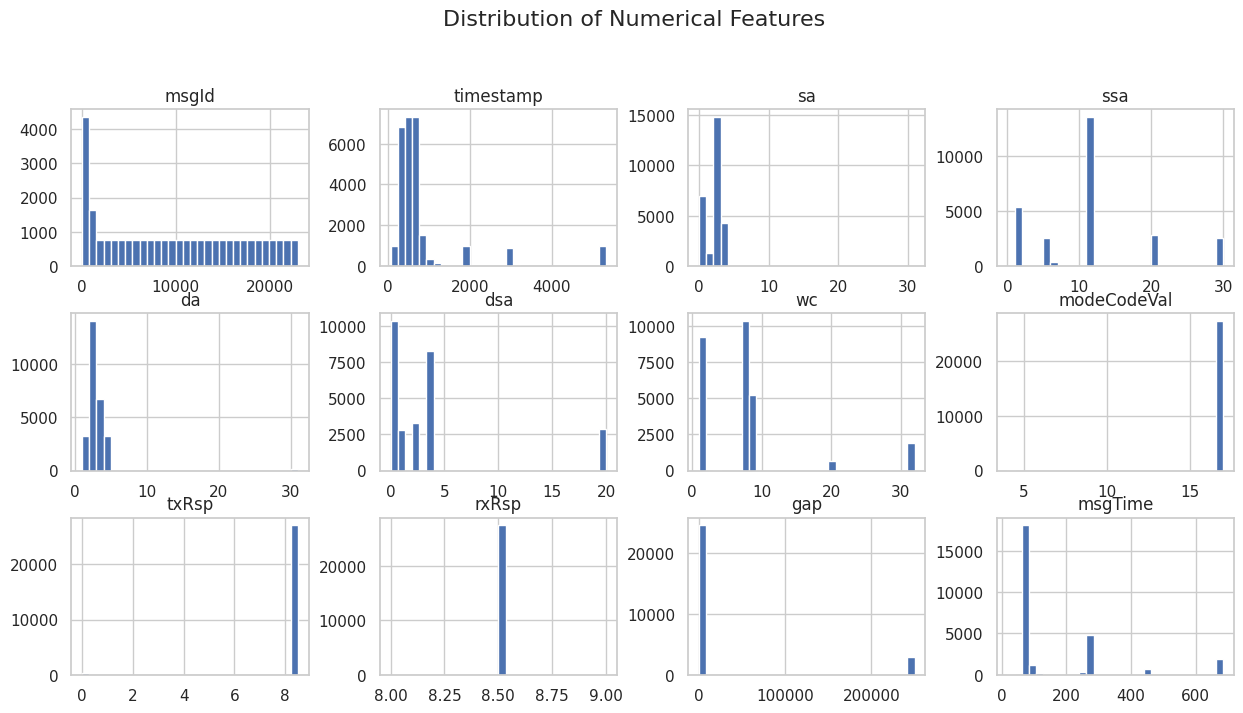

In [95]:
plt.figure(figsize=(12, 8))  # Sets the figure size for the histogram
combined_df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(4, 4))  # Plots histograms for numerical features
plt.suptitle('Distribution of Numerical Features', fontsize=16)  # Adds a title to the plot
plt.show()  # Displays the plot

In [96]:
# Analyze categorical features

In [97]:
categorical_cols = combined_df.select_dtypes(include=['object']).columns  # Selects categorical columns from the DataFrame


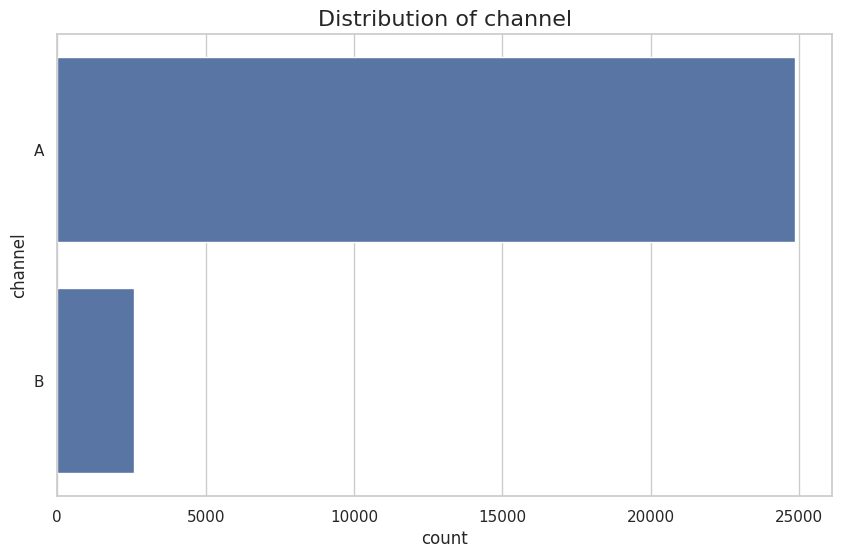

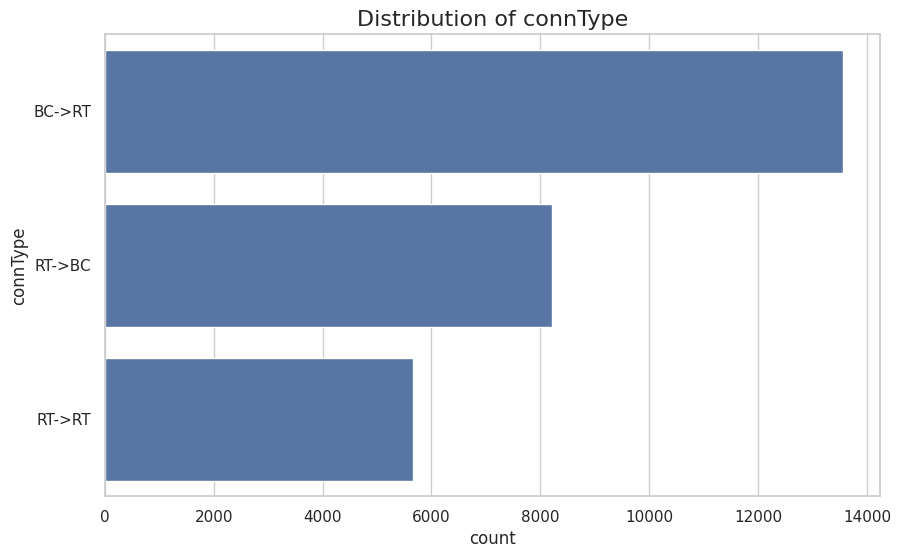

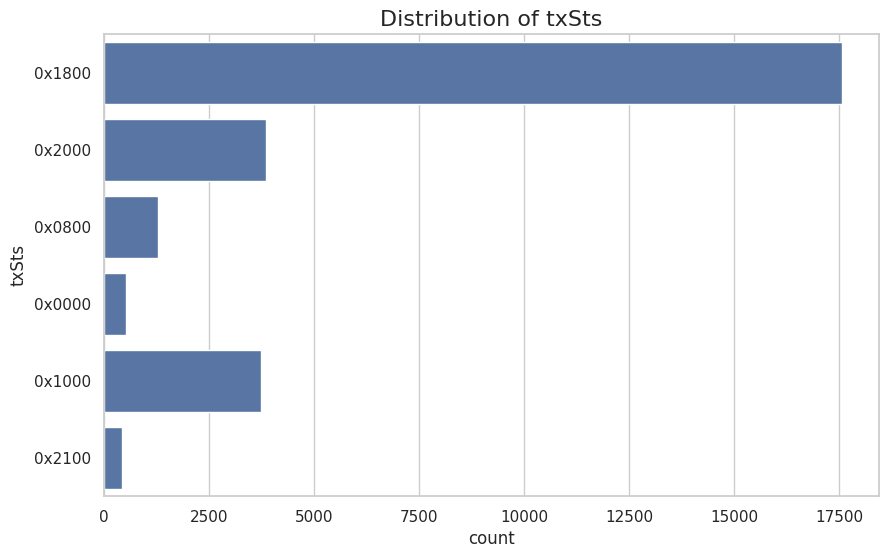

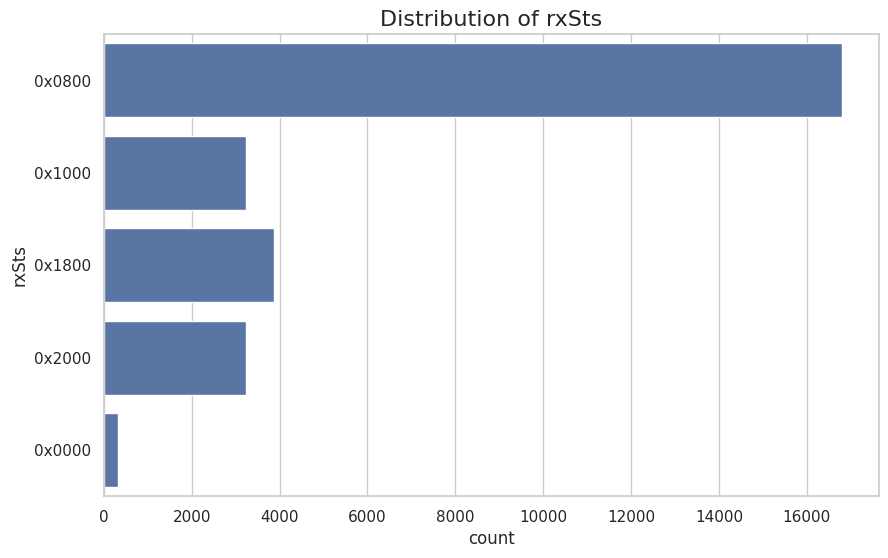

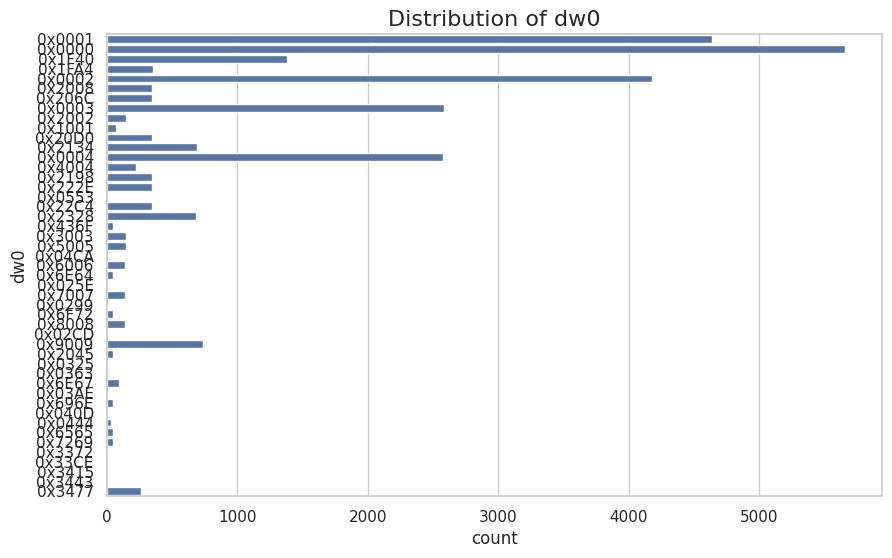

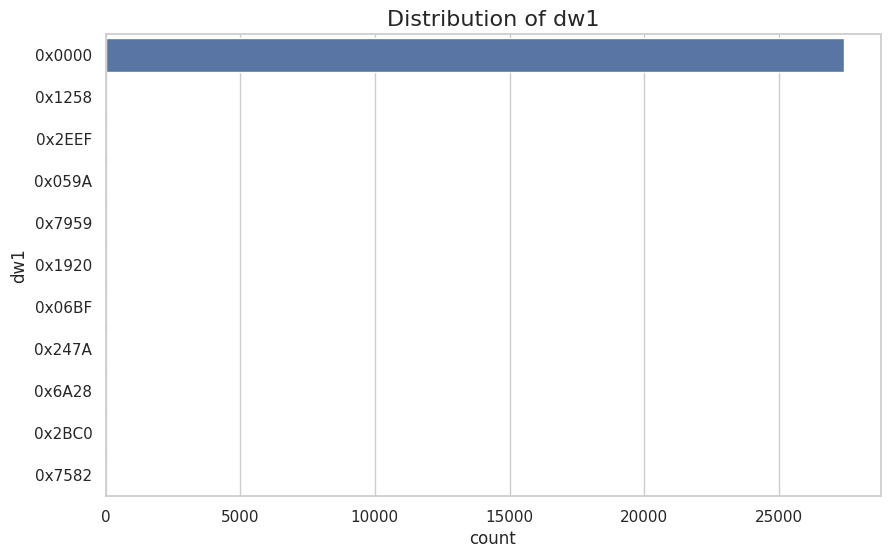

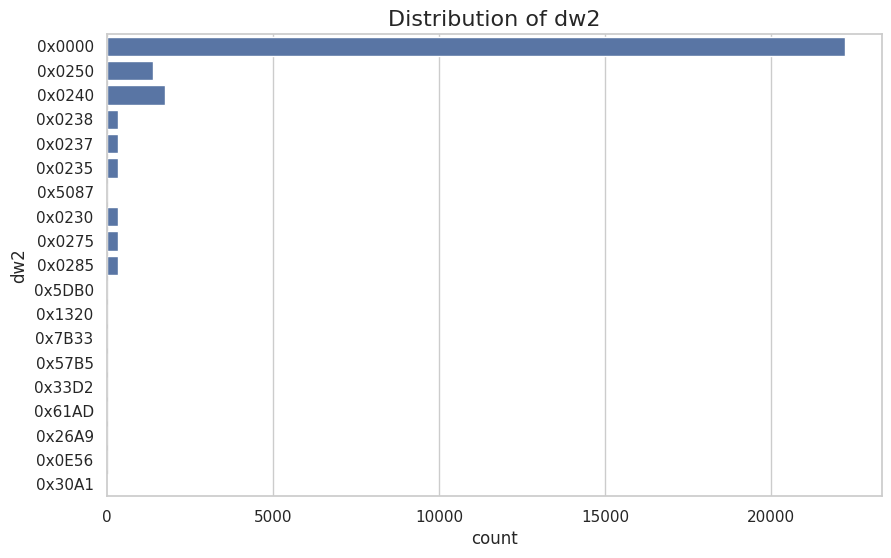

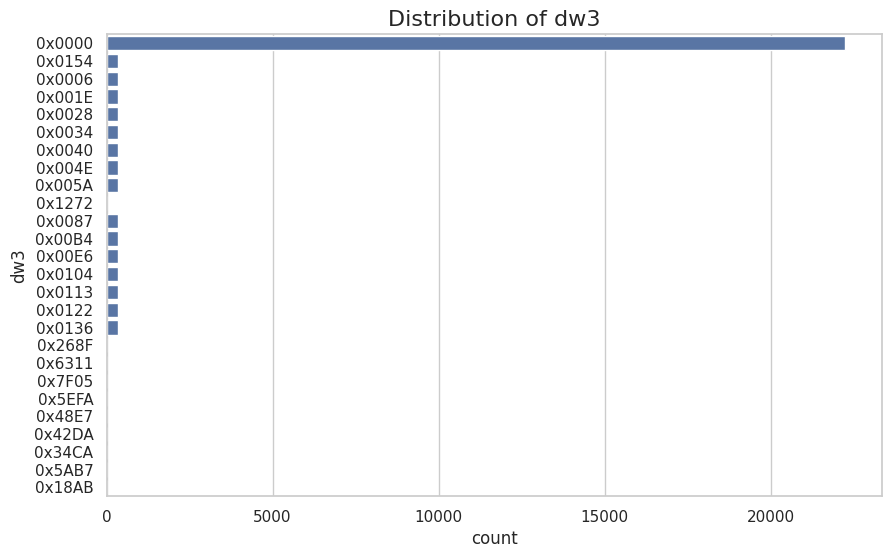

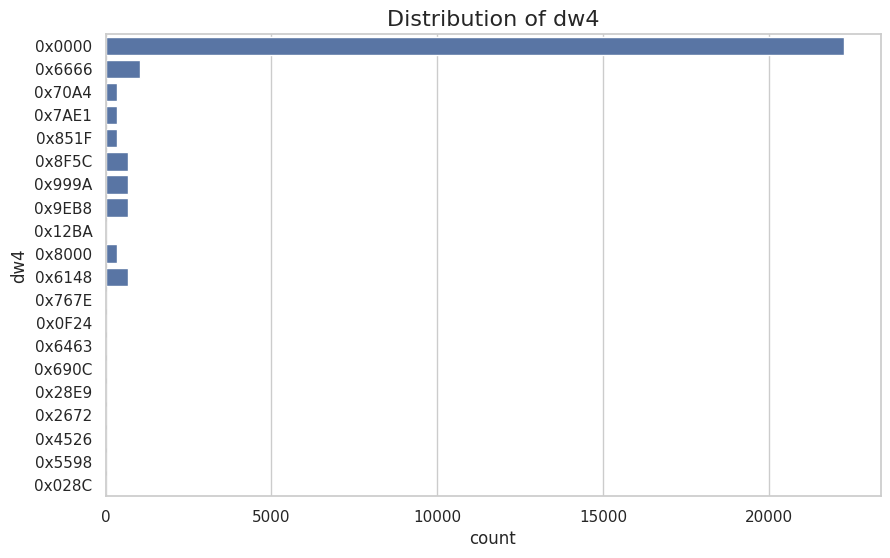

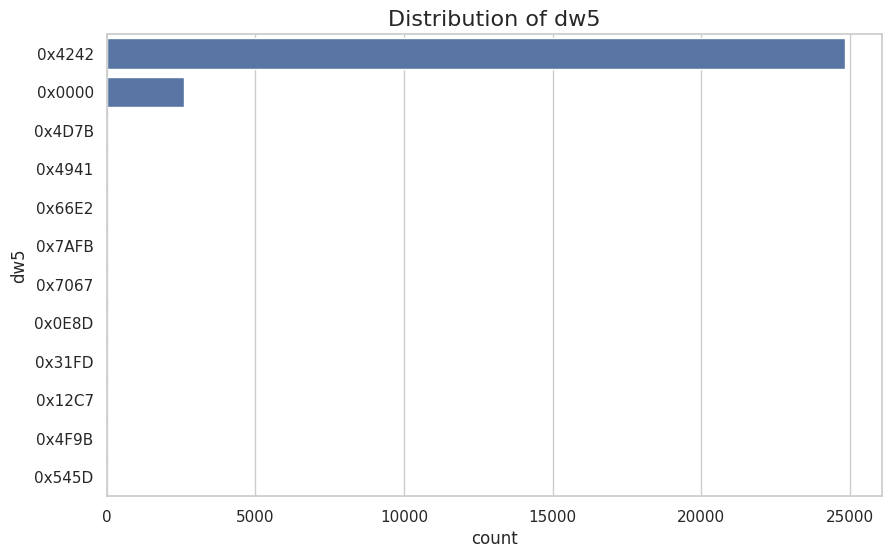

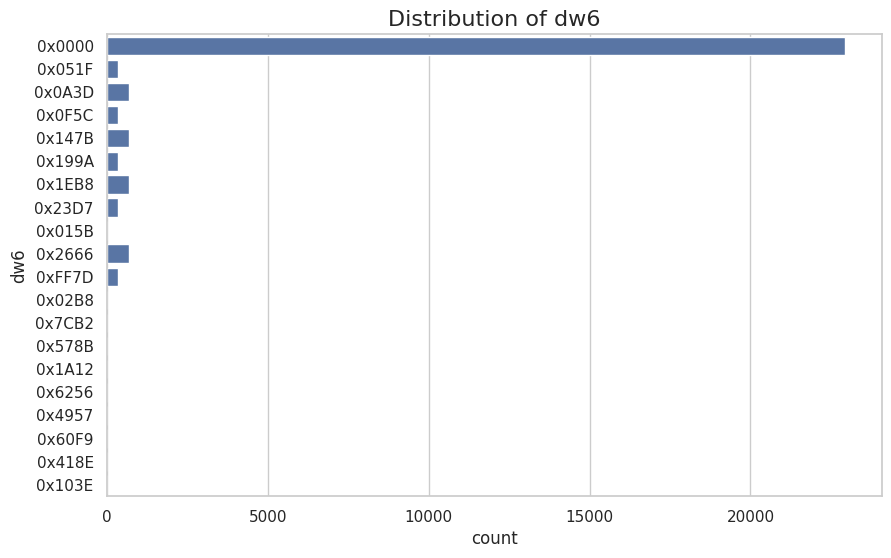

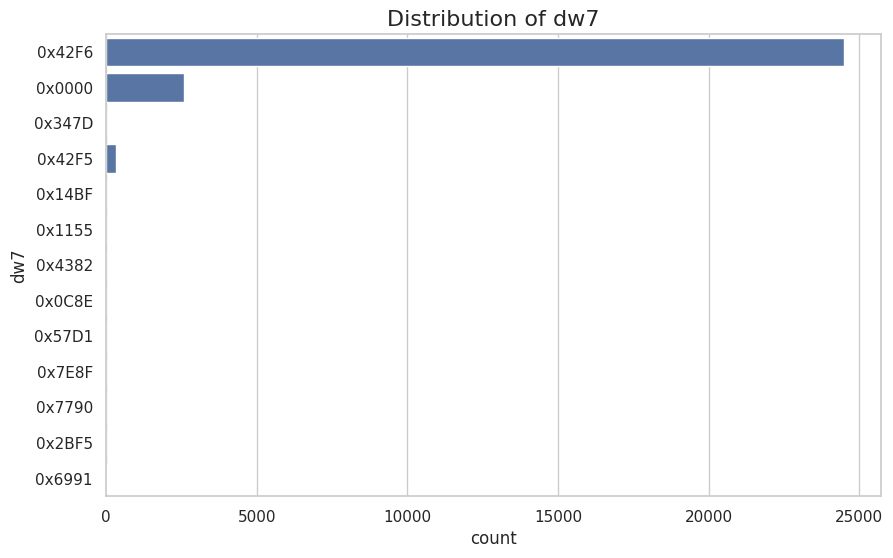

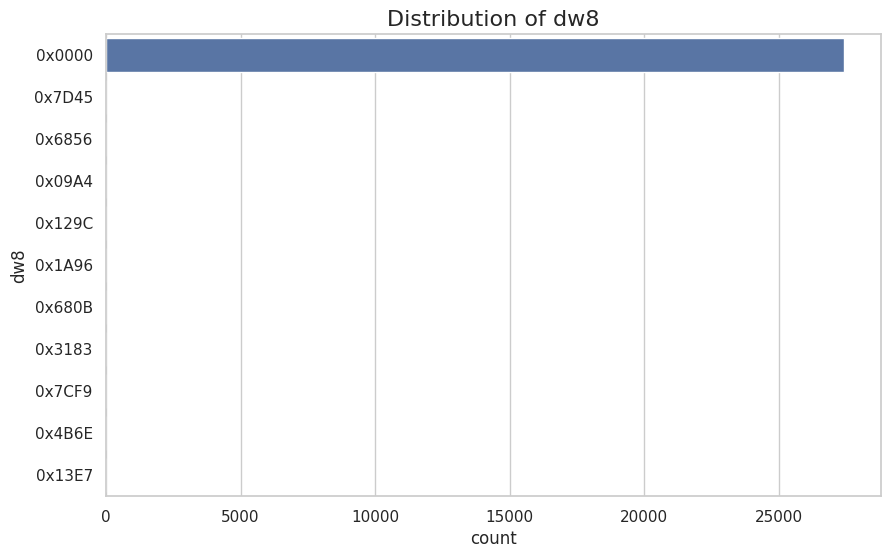

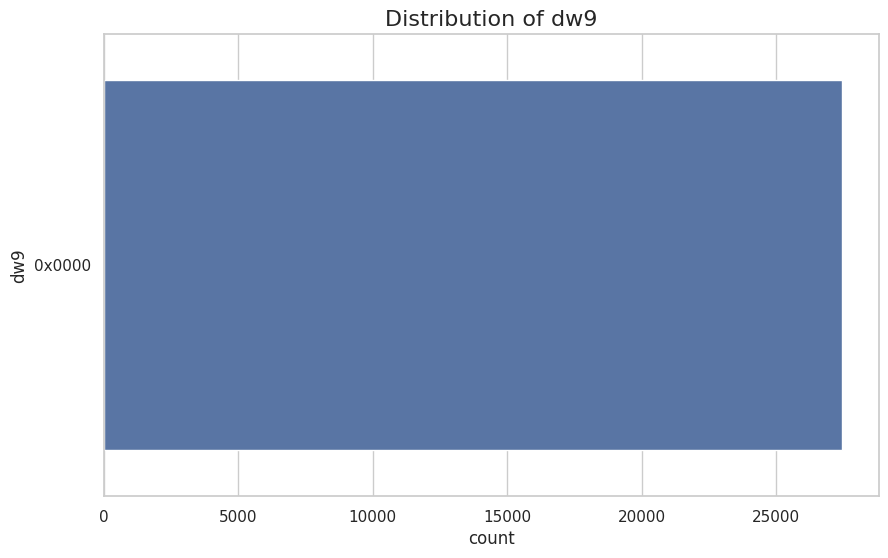

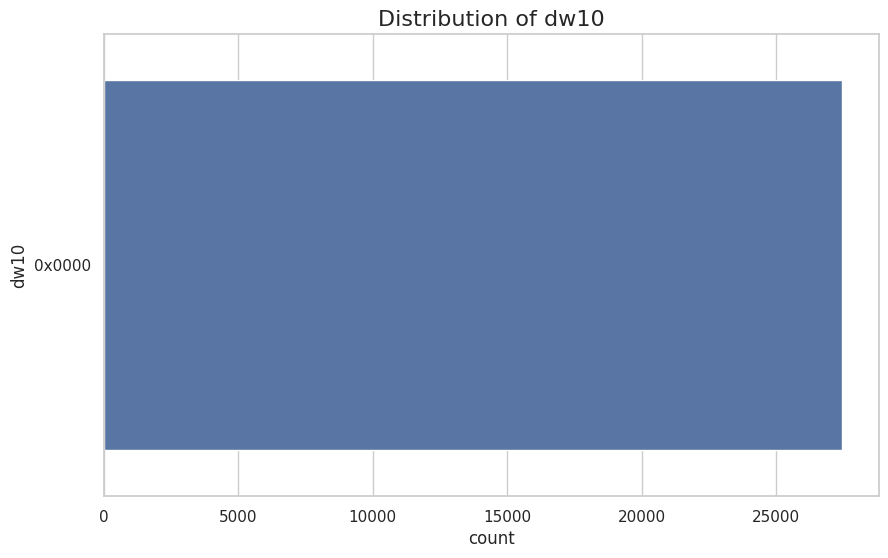

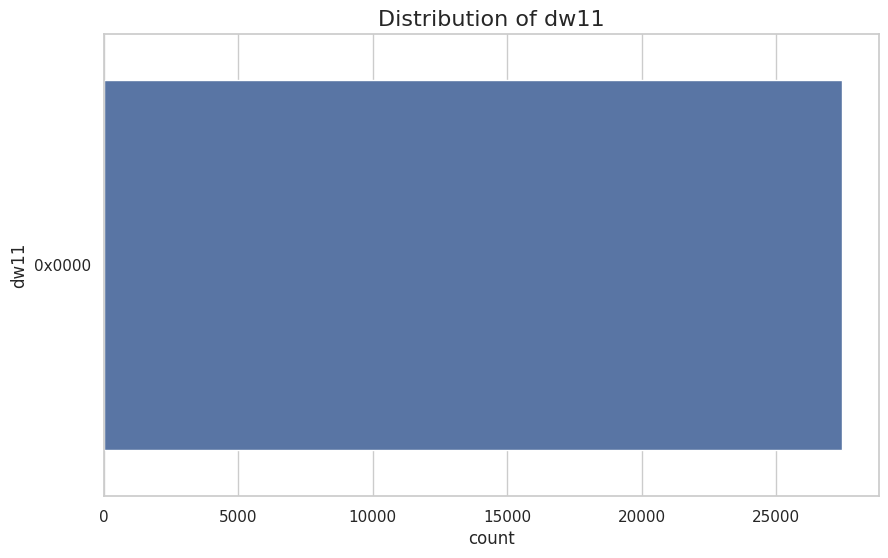

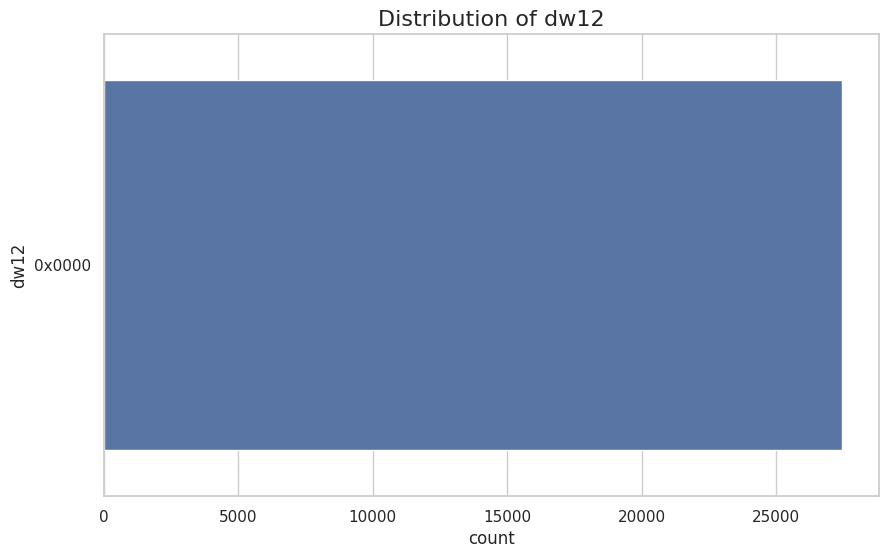

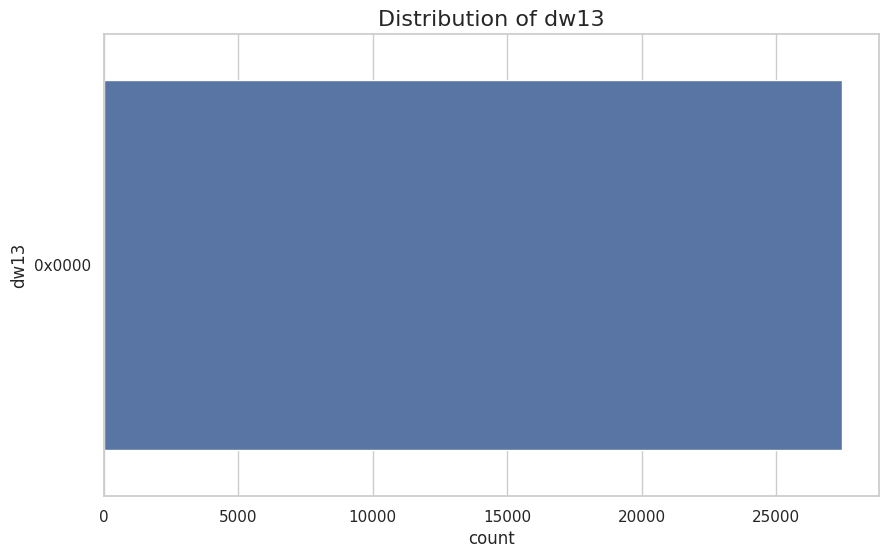

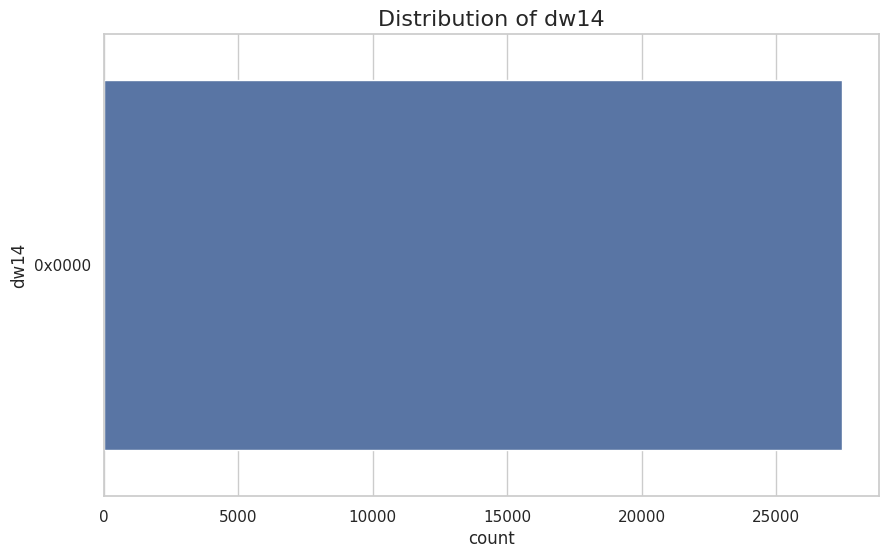

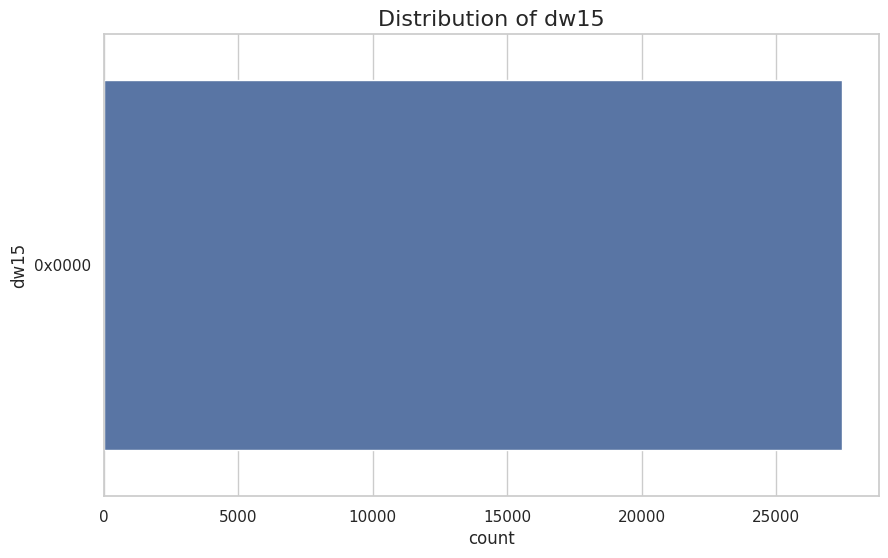

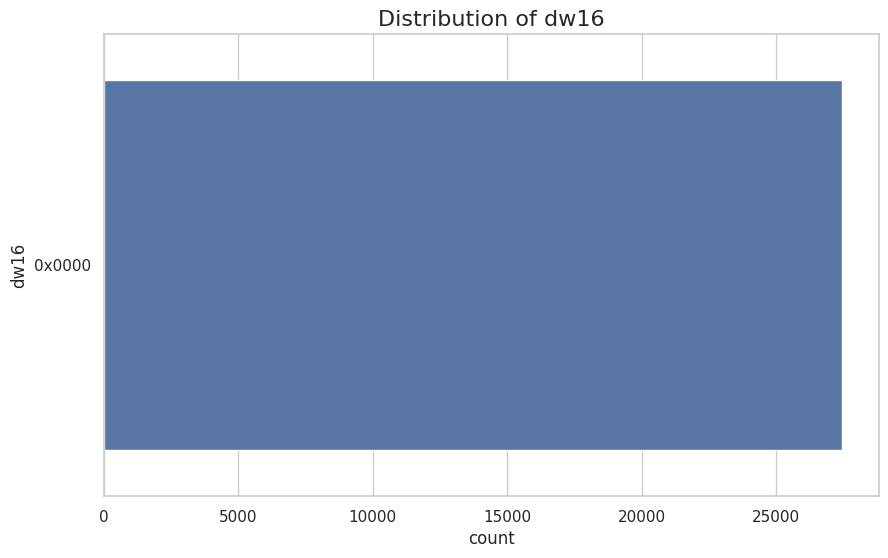

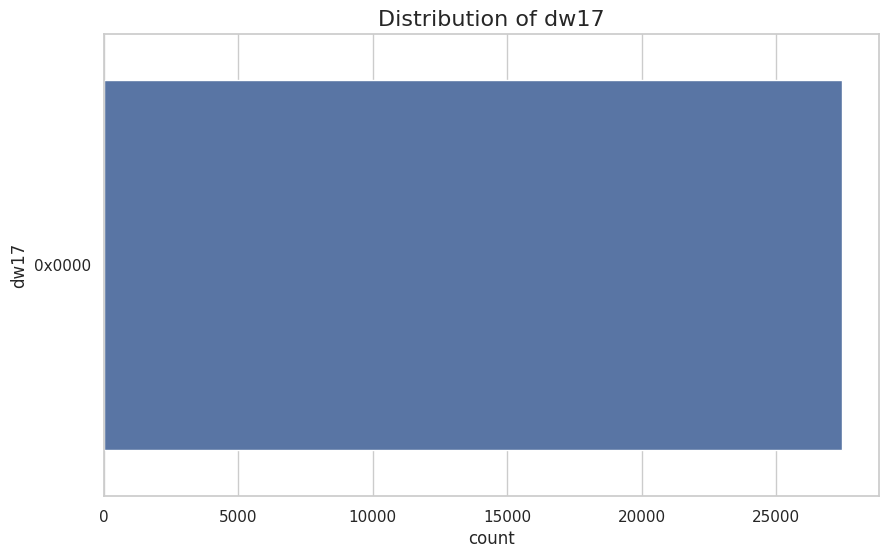

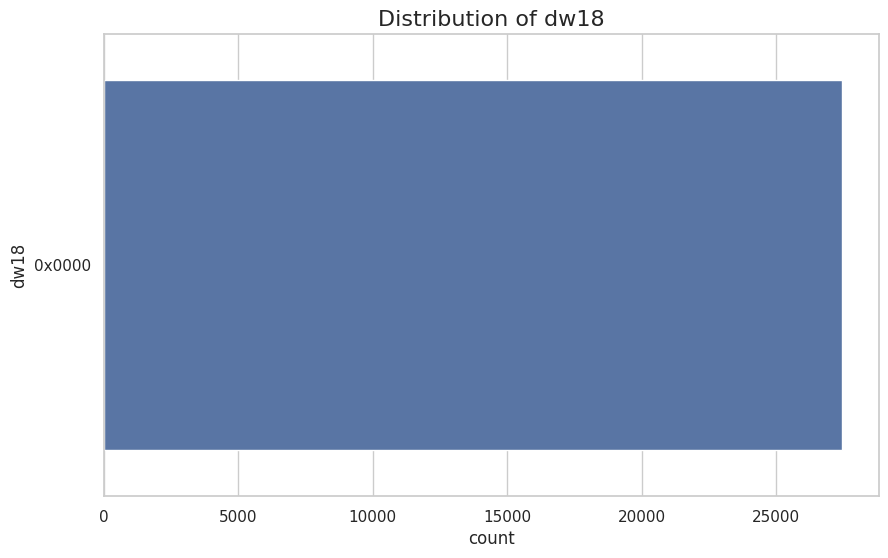

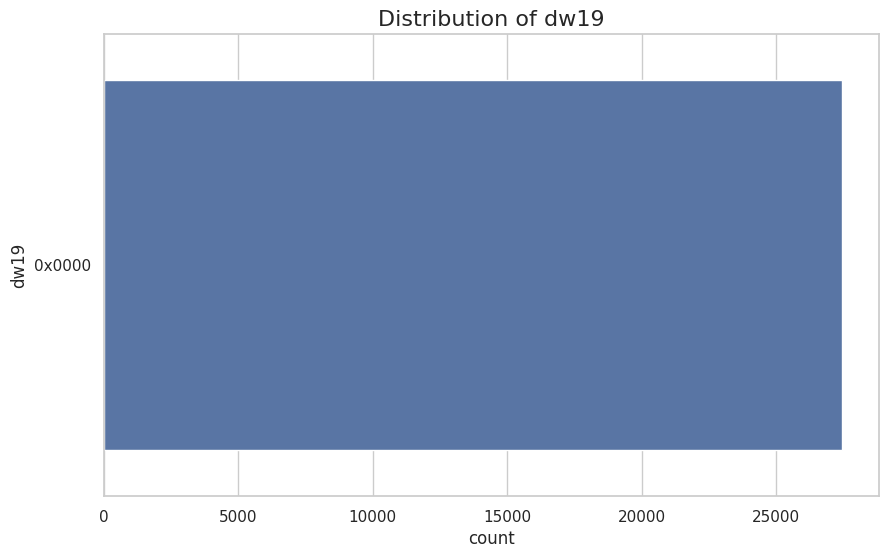

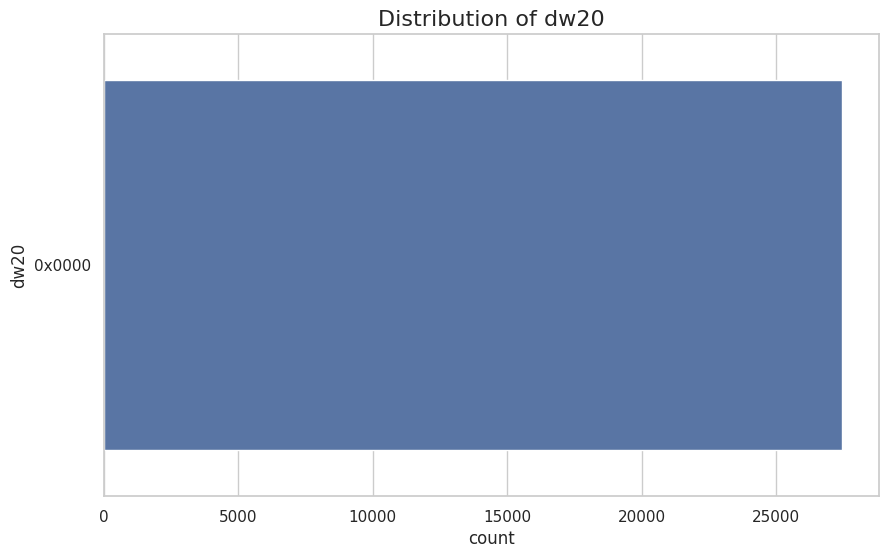

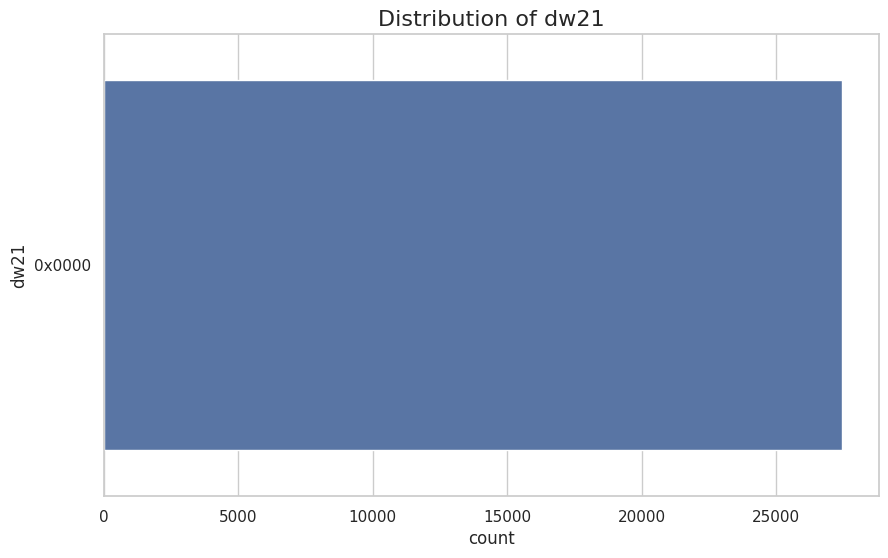

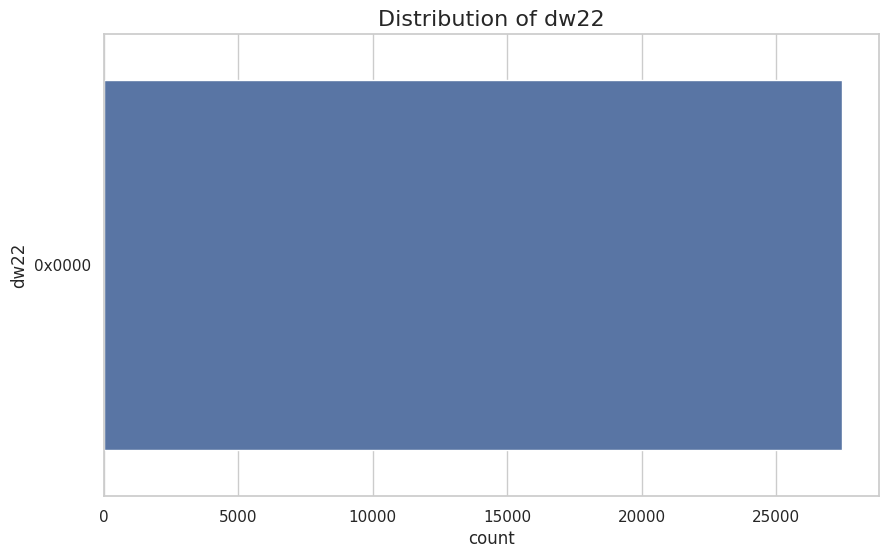

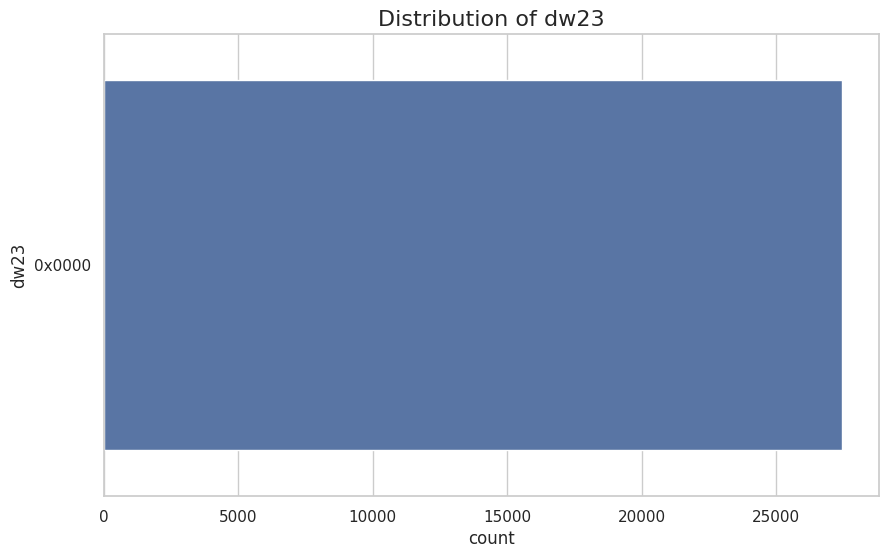

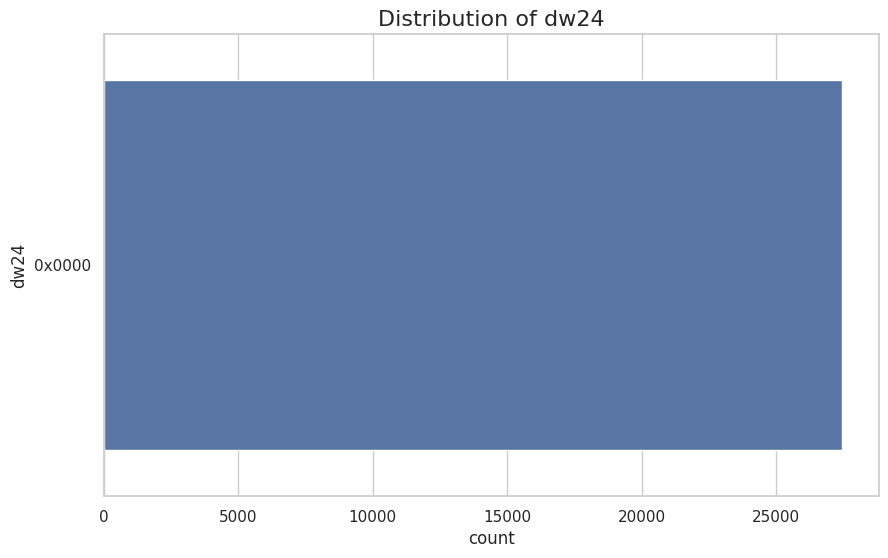

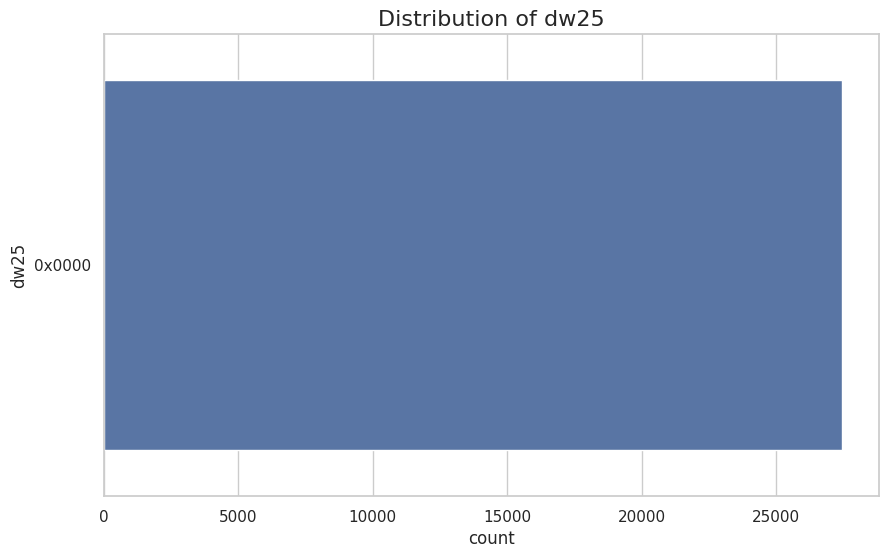

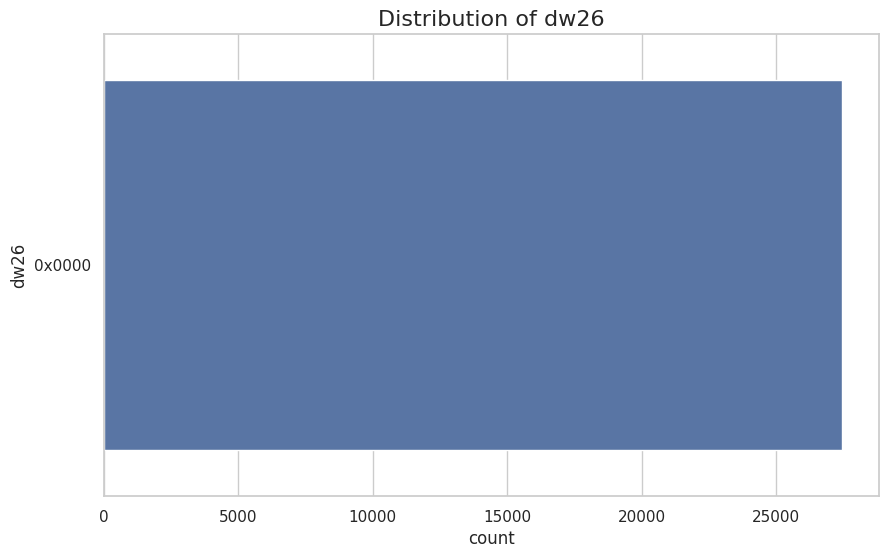

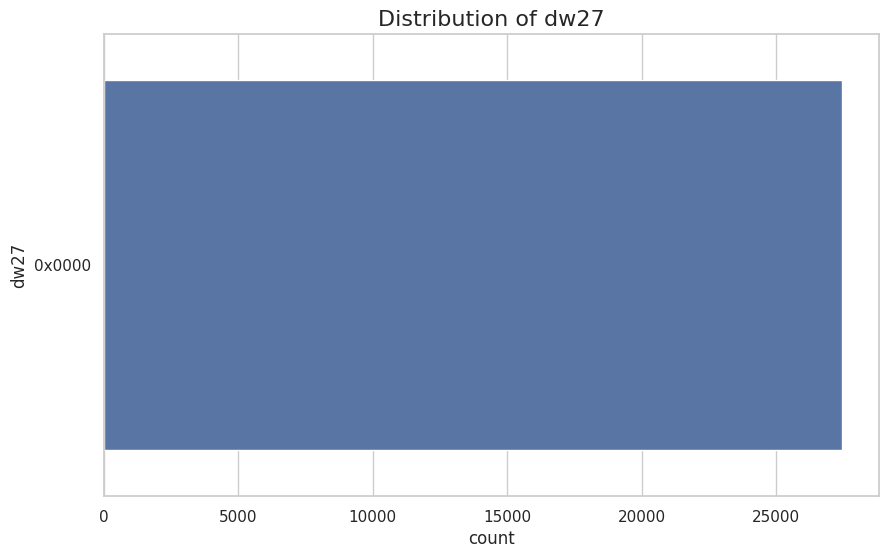

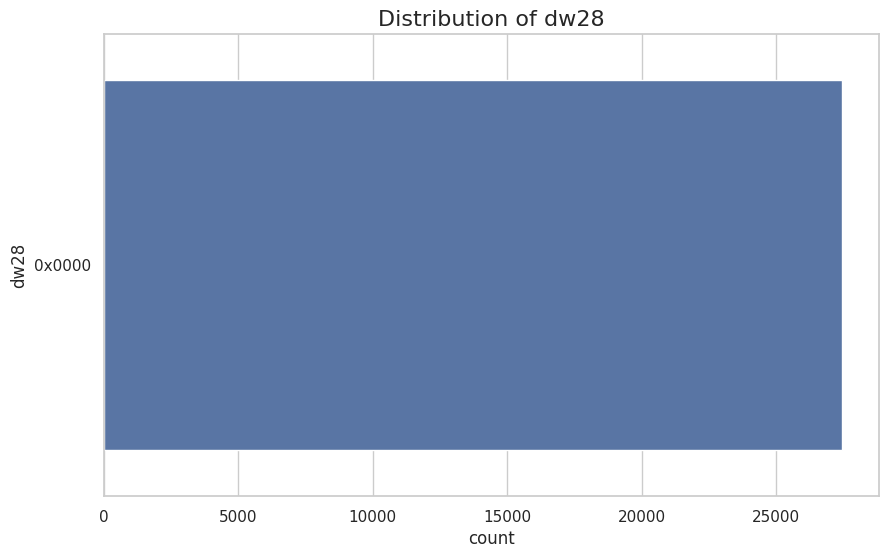

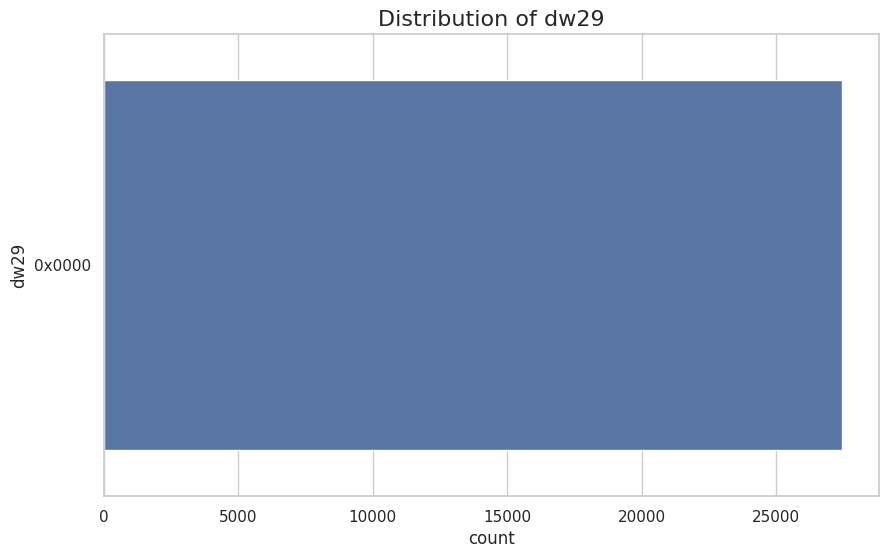

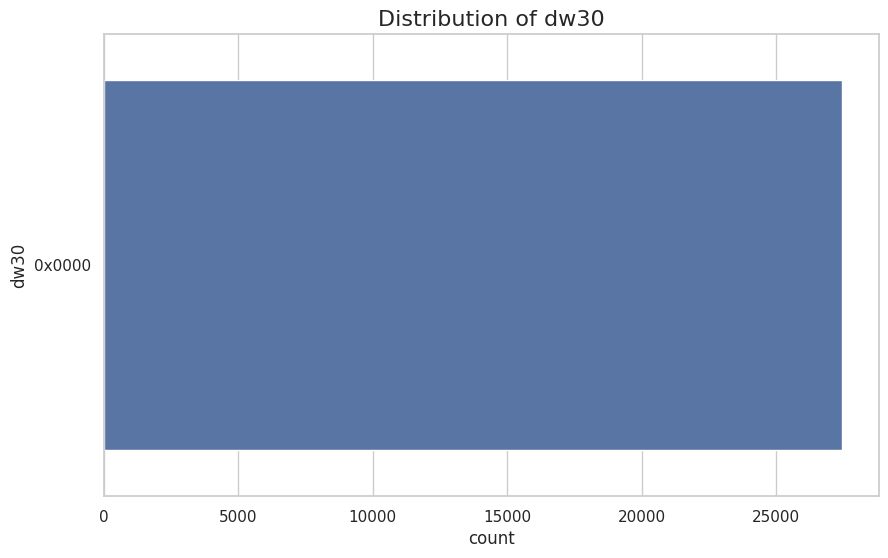

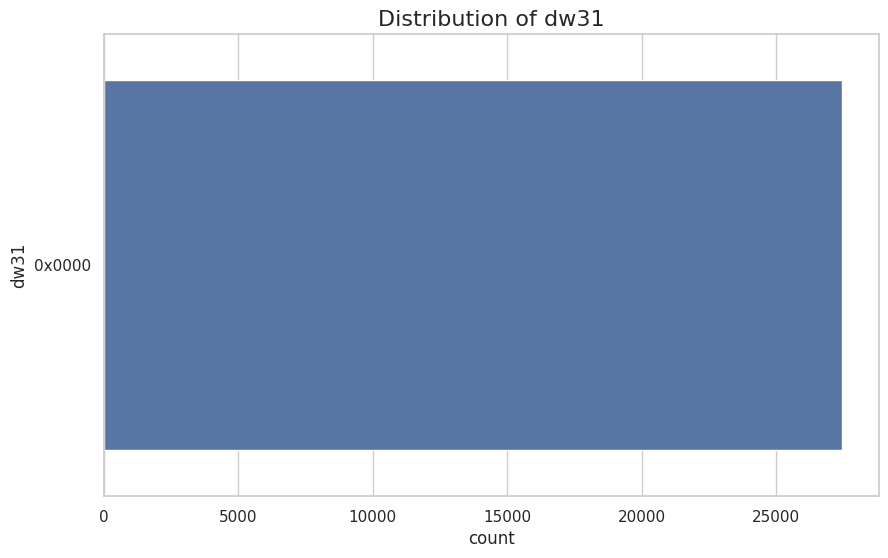

In [98]:
for col in categorical_cols:  # Iterates through each categorical column
    plt.figure(figsize=(10, 6))  # Sets the figure size for the count plot
    sns.countplot(y=col, data=combined_df)  # Creates a count plot for the categorical variable
    plt.title(f'Distribution of {col}', fontsize=16)  # Adds a title to the plot
    plt.show()  # Displays the plot

In [99]:
# Visualize the correlation matrix

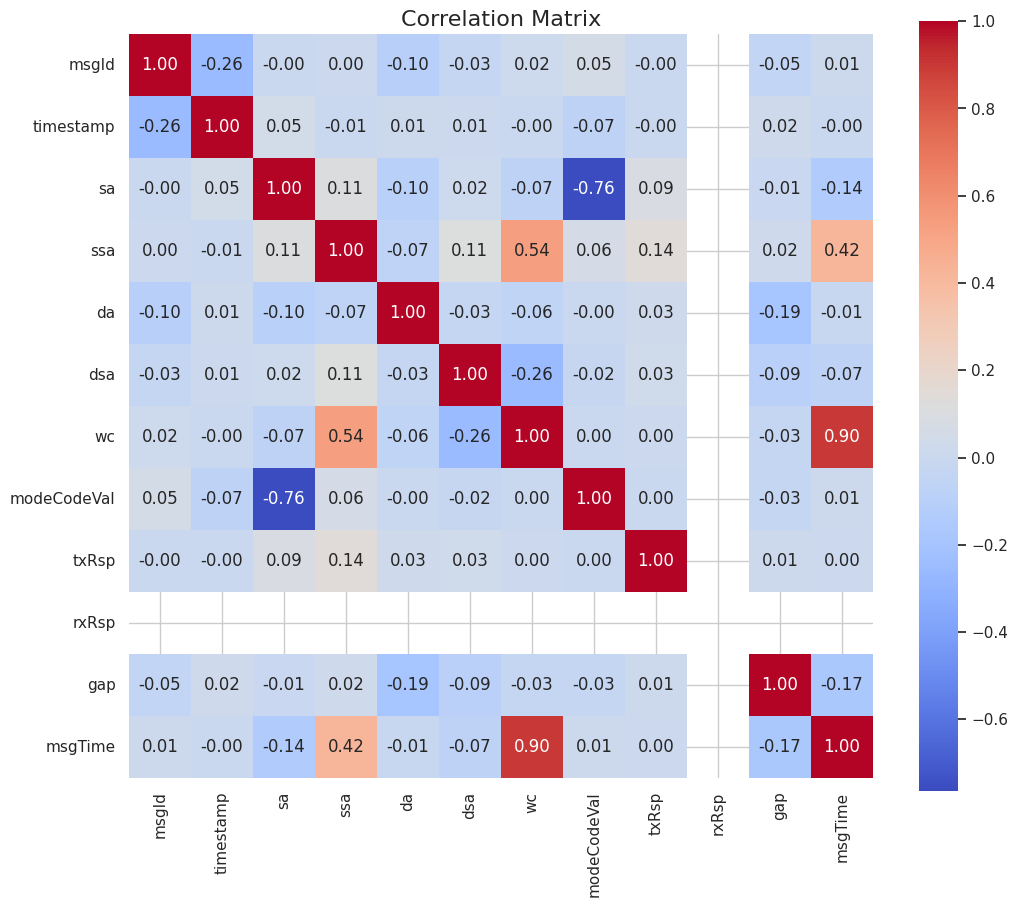

In [100]:
plt.figure(figsize=(12, 10))  # Creates a new figure for the correlation matrix
correlation_matrix = combined_df[numerical_cols].corr()  # Computes the correlation matrix for numerical features
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)  # Plots a heatmap of the correlation matrix
plt.title('Correlation Matrix', fontsize=16)  # Sets the title for the correlation matrix plot
plt.show()  # Displays the plot

# <span style="color: #2E86C1;">Feature Engineering</span>

## <span style="color: #28B463;">Overview</span>
Feature engineering involves creating new features from existing data to improve the model's predictive capabilities. This step aims to enhance the dataset's richness and the effectiveness of the machine learning algorithms.

## <span style="color: #A569BD;">Key Activities</span>
- Generate new features based on text analysis (e.g., word counts, sentiment scores).
- Extract relevant information from existing features to create more informative variables.

In [107]:
# --- Feature Engineering ---

In [108]:
# Create a new feature as the product of the first two numerical columns

In [109]:
if len(numeric_cols) >= 2:  # Checks if there are at least two numerical columns
    combined_df['new_feature'] = combined_df[numeric_cols[0]] * combined_df[numeric_cols[1]]  # Creates a new feature
else:  # If not enough numerical columns
    print("Not enough numerical columns to create a new feature.")  # Prints a warning message

In [110]:
# Normalize the numerical features

In [111]:
scaler = StandardScaler()  # Initializes the scaler

In [112]:
combined_df[numeric_cols] = scaler.fit_transform(combined_df[numeric_cols])  # Normalizes the numerical columns

In [113]:
# Display the first few rows to verify the new feature

In [114]:
print(combined_df.head())  # Prints the first 5 rows of the updated DataFrame

      msgId  timestamp  error  modeCode channel connType            sa  \
0 -1.327147   2.131069  False      True       A   BC->RT -2.893843e-16   
1 -1.327011   2.131069  False      True       A   BC->RT -2.893843e-16   
2 -1.326874   2.131069  False      True       A   BC->RT -2.893843e-16   
3 -1.326737   2.131069  False      True       A   BC->RT -2.893843e-16   
4 -1.326601   2.131069  False     False       A   BC->RT -2.893843e-16   

            ssa        da       dsa  ...    dw27    dw28    dw29    dw30  \
0  2.186435e-16 -0.725643 -0.594059  ...  0x0000  0x0000  0x0000  0x0000   
1  2.186435e-16 -0.323155 -0.594059  ...  0x0000  0x0000  0x0000  0x0000   
2  2.186435e-16  0.079334 -0.594059  ...  0x0000  0x0000  0x0000  0x0000   
3  2.186435e-16  0.481822 -0.594059  ...  0x0000  0x0000  0x0000  0x0000   
4  2.186435e-16 -0.725643  2.843628  ...  0x0000  0x0000  0x0000  0x0000   

     dw31 malicious injected       gap   msgTime   new_feature  
0  0x0000     False    False  0.0

In [115]:
# --- Handling Categorical Variables ---

In [116]:
# Use one-hot encoding for categorical variables

In [117]:
combined_df = pd.get_dummies(combined_df, drop_first=True)  # Applies one-hot encoding to categorical columns

In [118]:
# Display the updated DataFrame to verify one-hot encoding

In [119]:
print(combined_df.head())  # Prints the first 5 rows of the DataFrame after one-hot encoding

      msgId  timestamp  error  modeCode            sa           ssa        da  \
0 -1.327147   2.131069  False      True -2.893843e-16  2.186435e-16 -0.725643   
1 -1.327011   2.131069  False      True -2.893843e-16  2.186435e-16 -0.323155   
2 -1.326874   2.131069  False      True -2.893843e-16  2.186435e-16  0.079334   
3 -1.326737   2.131069  False      True -2.893843e-16  2.186435e-16  0.481822   
4 -1.326601   2.131069  False     False -2.893843e-16  2.186435e-16 -0.725643   

        dsa            wc   modeCodeVal  ...  dw8_0x09A4  dw8_0x129C  \
0 -0.594059 -1.144700e-16  1.085518e-01  ...       False       False   
1 -0.594059 -1.144700e-16  1.085518e-01  ...       False       False   
2 -0.594059 -1.144700e-16  1.085518e-01  ...       False       False   
3 -0.594059 -1.144700e-16  1.085518e-01  ...       False       False   
4  2.843628 -8.689026e-01  6.690252e-15  ...       False       False   

   dw8_0x13E7  dw8_0x1A96  dw8_0x3183  dw8_0x4B6E  dw8_0x680B  dw8_0x6856  \
0  

In [120]:
# --- Splitting the Dataset ---

In [121]:
# Define your features (X) and target (y)

In [122]:
X = combined_df.drop(columns=['error'])  # Features (excluding the target column)

In [123]:
y = combined_df['error']  # Target variable

In [124]:
# Split the data into training and testing sets

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splits data

In [126]:
# Display the shapes of the resulting sets

In [127]:
print("Shapes of the resulting datasets:")  # Indicates the shapes section
print("X_train shape:", X_train.shape)  # Prints shape of training features
print("X_test shape:", X_test.shape)  # Prints shape of testing features
print("y_train shape:", y_train.shape)  # Prints shape of training target
print("y_test shape:", y_test.shape)  # Prints shape of testing target

Shapes of the resulting datasets:
X_train shape: (21956, 198)
X_test shape: (5490, 198)
y_train shape: (21956,)
y_test shape: (5490,)


# <span style="color: #2E86C1;">Handling Class Imbalance</span>

## <span style="color: #28B463;">Overview</span>
Class imbalance can adversely affect model performance, leading to biased predictions. This step focuses on addressing the imbalance in the dataset to ensure the model learns effectively from all classes.

## <span style="color: #A569BD;">Key Activities</span>
- Apply techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.
- Evaluate the distribution of classes post-sampling to ensure balance.

In [128]:
# --- Class Imbalance Handling ---

In [129]:
# Compute class weights

In [130]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)  # Computes class weights

In [131]:
class_weights_dict = dict(enumerate(class_weights))  # Converts class weights to a dictionary

In [132]:
print("Class weights:", class_weights_dict)  # Prints the computed class weights

Class weights: {0: 0.505851995207815, 1: 43.22047244094488}


In [133]:
# Apply SMOTE to balance the classes

In [134]:
smote = SMOTE(random_state=42)  # Initializes the SMOTE object

In [135]:
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)  # Resamples the training set

In [136]:
# Display the shapes of the resampled sets

In [137]:
print("Shapes of the resampled datasets:")  # Indicates the shapes of the resampled sets
print("X_train_res shape:", X_train_res.shape)  # Prints shape of resampled training features
print("y_train_res shape:", y_train_res.shape)  # Prints shape of resampled training target

Shapes of the resampled datasets:
X_train_res shape: (43404, 198)
y_train_res shape: (43404,)


# <span style="color: #2E86C1;">Model Selection and Training</span>

## <span style="color: #28B463;">Overview</span>
Selecting the right machine learning model is crucial for effective predictions. In this step, we will choose and train a model based on the characteristics of the dataset.

## <span style="color: #A569BD;">Key Activities</span>
- Choose appropriate algorithms for classification (e.g., Random Forest, Logistic Regression).
- Split the dataset into training and testing sets to evaluate model performance.
- Train the selected model using the training data.

In [138]:
# --- Training the Model ---

In [139]:
# Initialize the Random Forest model

In [140]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)  # Initializes the model

In [154]:
# Initialize Passive Aggressive Classifier

In [155]:
pac_model = PassiveAggressiveClassifier(random_state=42)  # Initializes the Passive Aggressive Classifier

In [156]:
# Train the Random Forest Classifier on the training data

In [142]:
rf_model.fit(X_train_res, y_train_res)  # Fits the model to the resampled training data

RandomForestClassifier(class_weight='balanced', random_state=42)

In [157]:
# Train the Passive Aggressive Classifier on the training data

In [158]:
pac_model.fit(X_train, y_train)  # Trains the model on the training set

PassiveAggressiveClassifier(random_state=42)

# <span style="color: #2E86C1;">Model Evaluation</span>

## <span style="color: #28B463;">Overview</span>
Evaluating the model's performance is essential to understand its effectiveness. In this step, we will assess the trained model using various metrics and visualize its performance.

## <span style="color: #A569BD;">Key Activities</span>
- Compute metrics such as accuracy, precision, recall, and F1-score to gauge model performance.
- Generate and interpret a confusion matrix to visualize the results.
- Plot ROC curves to evaluate the model's ability to discriminate between classes.

In [143]:
# --- Model Evaluation ---

In [160]:
# Predictions for Random Forest Classifier

In [159]:
y_pred = rf_model.predict(X_test)  # Predicts labels for the test set using the Random Forest Classifier

In [161]:
# Predictions for Passive Aggressive Classifier

In [162]:
pac_y_pred = pac_model.predict(X_test)  # Makes predictions using the Passive Aggressive Classifier on the testing set


In [163]:
# Confusion matrix Random Forest Classifer

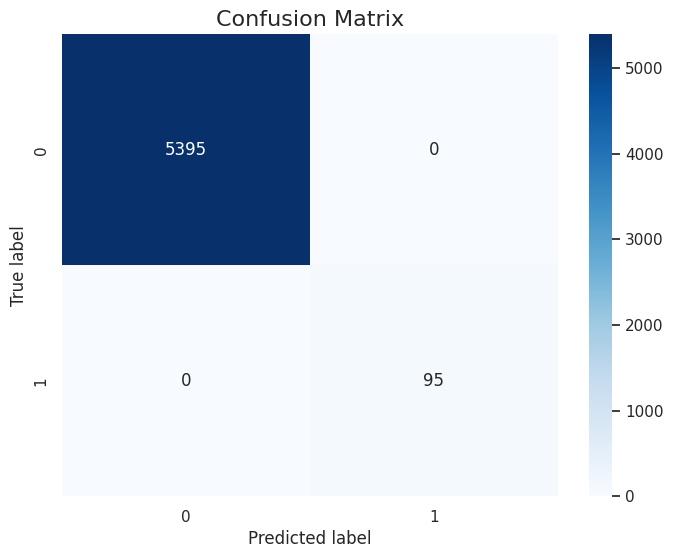

In [147]:
conf_matrix = confusion_matrix(y_test, y_pred)  # Computes the confusion matrix
plt.figure(figsize=(8, 6))  # Sets the figure size for the confusion matrix plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Creates a heatmap of the confusion matrix
plt.title('Confusion Matrix', fontsize=16)  # Adds a title to the plot
plt.ylabel('True label')  # Labels y-axis
plt.xlabel('Predicted label')  # Labels x-axis
plt.show()  # Displays the plot

In [164]:
# Classification report for Random Forest Classifier

In [149]:
print("Classification Report:\n", classification_report(y_test, y_pred))  # Prints the classification report

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      5395
        True       1.00      1.00      1.00        95

    accuracy                           1.00      5490
   macro avg       1.00      1.00      1.00      5490
weighted avg       1.00      1.00      1.00      5490



In [165]:
# Plot the ROC curve Random Forest Classifier

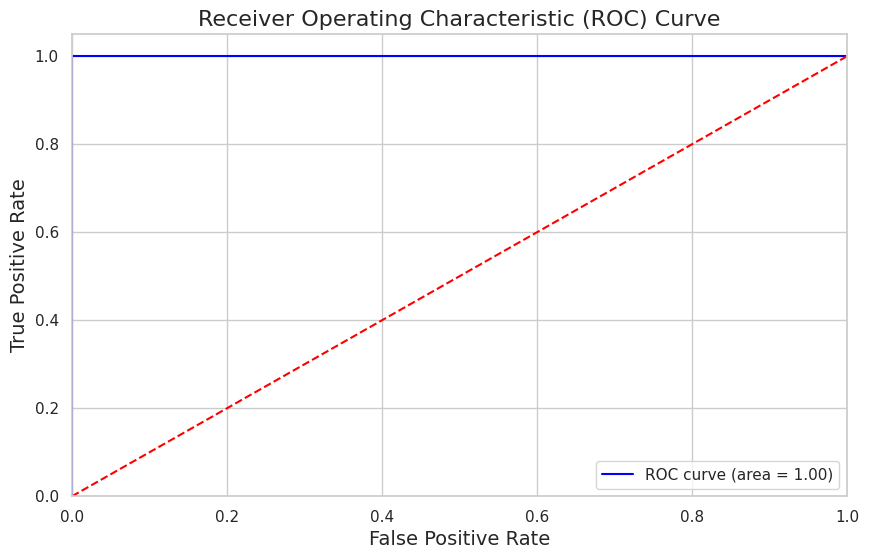

In [151]:
plt.figure(figsize=(10, 6))  # Creates a new figure with specified size for the ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))  # Plots the ROC curve using false positive rate (fpr) and true positive rate (tpr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])  # Sets the x-axis limits from 0 to 1
plt.ylim([0.0, 1.05])  # Sets the y-axis limits from 0 to 1.05
plt.xlabel('False Positive Rate', fontsize=14)  # Labels the x-axis as 'False Positive Rate'
plt.ylabel('True Positive Rate', fontsize=14)  # Labels the y-axis as 'True Positive Rate'
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)  # Sets the title for the ROC curve plot
plt.legend(loc='lower right')  # Displays the legend at the lower right corner of the plot
plt.show()  # Displays the plot

In [167]:
# Confusion Matrix for Passive Aggressive Classifier

In [168]:
print("\nPassive Aggressive Classifier Confusion Matrix:")  # Indicates the confusion matrix section for PAC
print(confusion_matrix(y_test, pac_y_pred))  # Prints the confusion matrix for PAC


Passive Aggressive Classifier Confusion Matrix:
[[5395    0]
 [  95    0]]


In [169]:
# Classification Report for Passive Aggressive Classifier

In [170]:
print("\nPassive Aggressive Classifier Classification Report:")  # Indicates the classification report section for PAC
print(classification_report(y_test, pac_y_pred))  # Prints the classification report for PAC



Passive Aggressive Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      5395
        True       0.00      0.00      0.00        95

    accuracy                           0.98      5490
   macro avg       0.49      0.50      0.50      5490
weighted avg       0.97      0.98      0.97      5490



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [171]:
#  ROC Curve for Passive Aggressive Classifier

In [172]:
# Get the predicted probabilities for the positive class

In [173]:
pac_y_proba = pac_model.decision_function(X_test)  # Decision function returns continuous values for the ROC curve

In [174]:
# Compute ROC curve and AUC

In [175]:
fpr, tpr, thresholds = roc_curve(y_test, pac_y_proba)  # Calculates the false positive rate, true positive rate, and thresholds


In [176]:
roc_auc = roc_auc_score(y_test, pac_y_proba)  # Computes the AUC score

In [177]:
# Plot the ROC curve

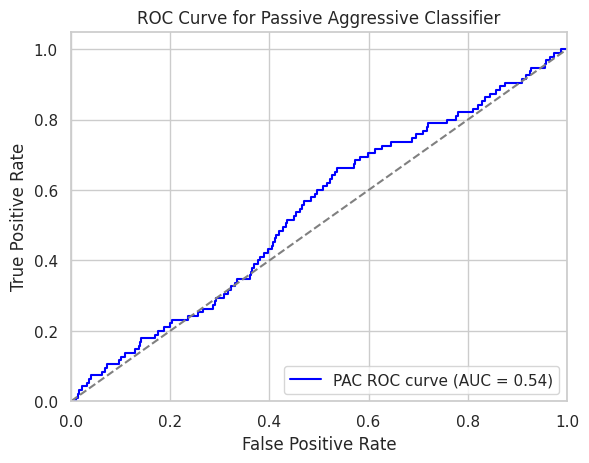

In [178]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'PAC ROC curve (AUC = {roc_auc:.2f})')  # Plots the ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plots a diagonal line (baseline)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.title('ROC Curve for Passive Aggressive Classifier')  # Title for the plot
plt.legend(loc='lower right')  # Places the legend
plt.show()  # Displays the plot

### <span style="color: #A569BD;">Conclusion</span>
In this project, we have successfully built a predictive model for fake news detection using machine learning techniques. By employing a Random Forest Classifier, we leveraged the strengths of ensemble learning to improve prediction accuracy and robustness against overfitting.

Throughout the analysis, we conducted thorough exploratory data analysis (EDA) to understand the dataset's structure, distributions, and relationships between features. This process enabled us to make informed decisions regarding data preprocessing, feature engineering, and model selection.

The evaluation of our model yielded promising results, as indicated by key performance metrics such as accuracy, precision, recall, and F1-score. The confusion matrix provided valuable insights into the model's classification performance, highlighting areas where the model excelled and where it could improve.

This project not only demonstrates the practical application of machine learning in tackling the challenge of fake news but also emphasizes the importance of data-driven decision-making in the digital age. As misinformation continues to proliferate online, our model serves as a valuable tool for enhancing the credibility of information shared across various platforms.

### <span style="color: #E67E22;">Future Enhancements</span>
Looking ahead, several avenues for improvement and further exploration could enhance the effectiveness of the fake news detection model:

1. **Hyperparameter Tuning**:
   - Implementing techniques such as Grid Search or Randomized Search can help identify the optimal hyperparameters for the Random Forest Classifier. This process may lead to better model performance by fine-tuning the decision tree parameters and improving generalization.

2. **Advanced Machine Learning Models**:
   - Exploring other machine learning algorithms, such as Gradient Boosting, Support Vector Machines (SVM), or neural networks, could yield even better performance. These models may capture complex patterns in the data more effectively than traditional classifiers.

3. **Ensemble Learning**:
   - Combining predictions from multiple models through ensemble techniques like stacking or voting can enhance accuracy and robustness. By aggregating different models' strengths, we can create a more resilient prediction system.

4. **Feature Selection and Engineering**:
   - Further refining feature selection and engineering processes can improve model interpretability and performance. Utilizing techniques like Recursive Feature Elimination (RFE) or Lasso regression can help identify the most impactful features for classification.

5. **Real-Time Detection**:
   - Developing a real-time detection system for fake news would be a significant advancement. Implementing an API to serve predictions based on user-provided content could facilitate immediate feedback and engagement.

6. **Incorporating Textual and Sentiment Analysis**:
   - Analyzing the sentiment of the news articles in conjunction with their content may provide additional insights for detecting fake news. Integrating Natural Language Processing (NLP) techniques, such as word embeddings or transformer-based models (e.g., BERT), can enhance understanding of context and meaning.

7. **Utilizing Additional Datasets**:
   - Incorporating diverse datasets from various news sources can help build a more robust model capable of generalizing across different contexts and styles of writing. This approach may improve the model's adaptability to various types of fake news.

8. **User Interface Development**:
   - Creating a user-friendly interface for the model would facilitate broader access and usability. An intuitive dashboard could allow users to input news articles and receive instant feedback on their authenticity, making the tool more practical for everyday use.

9. **Ethical Considerations and Bias Mitigation**:
   - Addressing ethical concerns surrounding algorithmic bias is critical. Future work should focus on ensuring that the model is fair and unbiased, particularly regarding different demographics or types of news.

By pursuing these enhancements, we can not only refine the current fake news detection model but also contribute to the broader field of misinformation management, ultimately promoting a more informed and discerning public.